In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Task 1: Đọc dữ liệu

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv', names=["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"])
df

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Task 2: Tính ma trận tương quan cho tập dữ liệu.

In [3]:
corr = df.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Task 3: Trực quan ma trận tương quan bằng heatmap trong seaborn.

<AxesSubplot:>

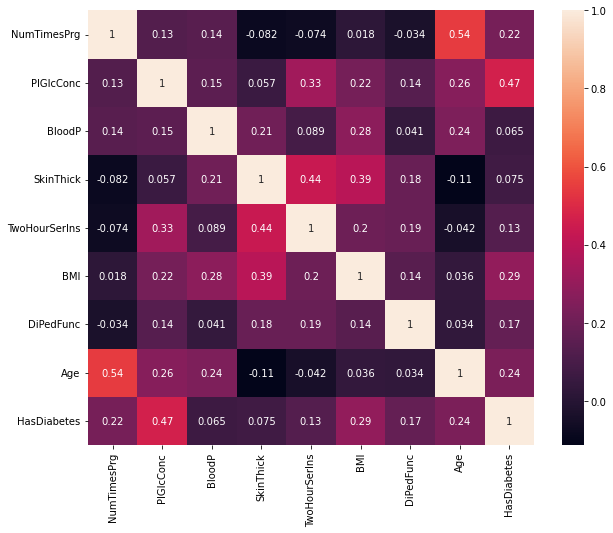

In [4]:
import seaborn as sns

plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True)

# Task 4: Trực quan histogram với tất cả cột tập dữ liệu.

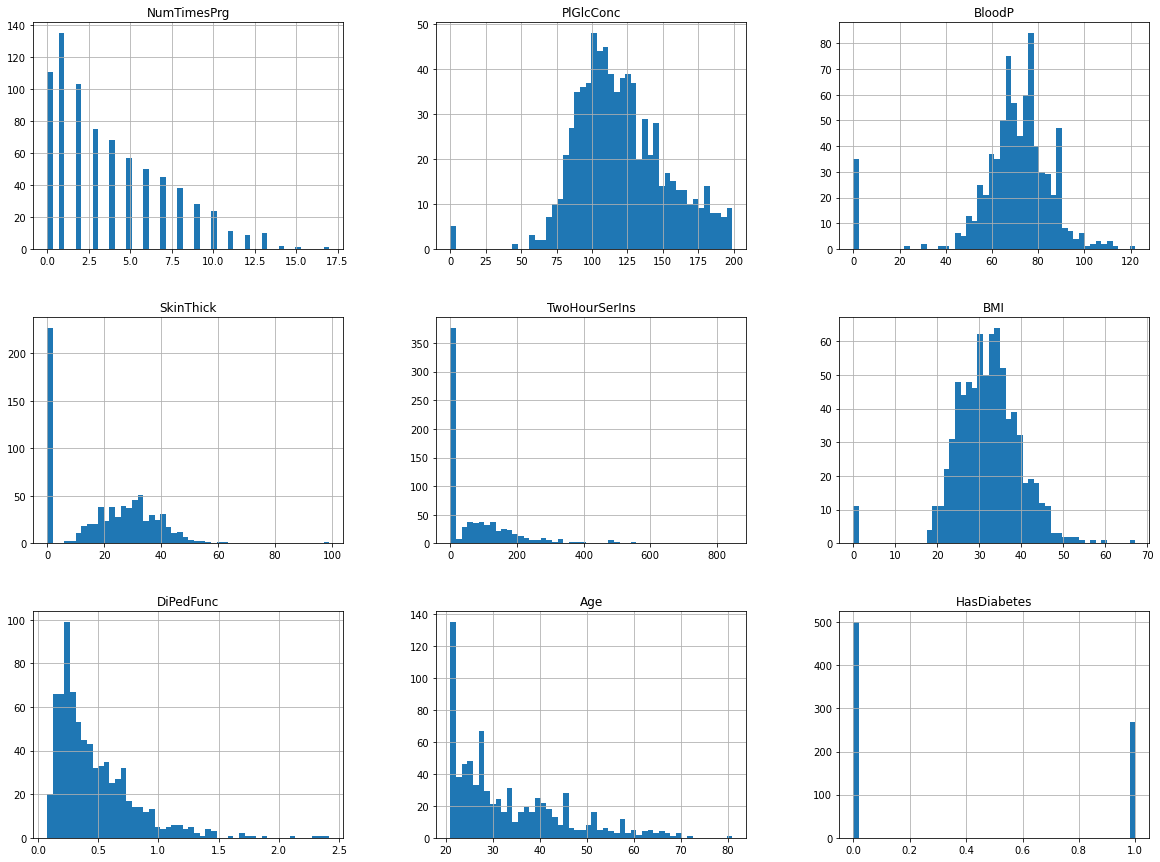

In [5]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Task 5: Gán giá trị bị khuyết trên ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] bằng giá trị trung vị hoặc bất kỳ cách nào khác có hiệu quả.

In [6]:
# Kiểm tra các giá trị NA
df.isna().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

In [7]:
# Kiểm tra các giá trị 0 trong dataframe
(df == 0).sum()

NumTimesPrg      111
PlGlcConc          5
BloodP            35
SkinThick        227
TwoHourSerIns    374
BMI               11
DiPedFunc          0
Age                0
HasDiabetes      500
dtype: int64

In [8]:
# Thay thế giá trị 0 ở mỗi cột bằng median của chúng
df['BMI'] = df['BMI'].replace(to_replace=0, value=df['BMI'].median())
df['BloodP'] = df['BloodP'].replace(to_replace=0, value=df['BloodP'].median())
df['PlGlcConc'] = df['PlGlcConc'].replace(to_replace=0, value=df['PlGlcConc'].median())
df['SkinThick'] = df['SkinThick'].replace(to_replace=0, value=df['SkinThick'].median())
df['TwoHourSerIns'] = df['TwoHourSerIns'].replace(to_replace=0, value=df['TwoHourSerIns'].median())
df

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


# Task 6: Thực hiện co giãn dữ liệu thành giá trị trung bình bằng 0 và phương sai bằng 1

In [9]:
X = df.drop('HasDiabetes', axis = 1)
y = df.HasDiabetes

scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

# Task 7: Tách tập dữ liệu train/test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Câu hỏi: Tại sao chúng ta nên thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện?

Đáp án:

- Ta cần thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện vì khi đánh giá hiệu suất dự đoán của mô hình, ta không được thiên vị, do đó ta cần chia tách dữ liệu để giảm khả năng sai lệch trong quá trình đánh giá và xác nhận của mình.

# Task 8: In ra tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ, tập huấn luyện và tập kiểm tra.

In [11]:
print('Tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ: {}%'.format(round(y.value_counts(normalize=True)[1]*100,2)))
print('Tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập huấn luyện: {}%'.format(round(y_train.value_counts(normalize=True)[1]*100,2)))
print('Tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập kiểm tra: {}%'.format(round(y_test.value_counts(normalize=True)[1]*100,2)))

Tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ: 34.9%
Tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập huấn luyện: 34.36%
Tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập kiểm tra: 37.01%


# Phân loại

In [12]:
from sklearn.metrics import jaccard_score, f1_score, accuracy_score

In [13]:
# Dictionary để giữ tất cả score của bộ phân loại
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}

# Task 9: K Nearest Neighbor(KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
# Tuning tham số
params = {'n_neighbors': range(1,21), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}
neigh = KNeighborsClassifier()
knn_search = GridSearchCV(neigh, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5)
knn_search.fit(X_train, y_train)
knn_model = knn_search.best_estimator_

# Các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất
print('Các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất: ')
knn_model.get_params()

Các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất: 


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

In [16]:
# Đưa ra dự đoán từ train set và kiếm tra trên mô hình
yhat = knn_model.predict(X_test)
print('Train set accuracy: ', accuracy_score(y_train, knn_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, yhat))

Train set accuracy:  0.7752442996742671
Test set accuracy:  0.7662337662337663


In [17]:
# Tính f1 score và Jaccard score
f1_scores['train']['KNN'] = f1_score(y_train, knn_model.predict(X_train))
f1_scores['test']['KNN'] = f1_score(y_test, knn_model.predict(X_test))
print('Test set f1 score:', f1_scores['test']['KNN'])

jaccard_scores['train']['KNN'] = jaccard_score(y_train, knn_model.predict(X_train), pos_label=0)
jaccard_scores['test']['KNN'] = jaccard_score(y_test, knn_model.predict(X_test), pos_label=0)
print('Test set jaccard score:', jaccard_scores['test']['KNN'])

Test set f1 score: 0.6
Test set jaccard score: 0.7165354330708661


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán KNN**

- n_neighbors: là số lượng điểm dữ liệu gần nhau
- weights: cách đánh trọng số cho các điểm dữ liệu
- metric: loại thang đo khoảng cách

# Task 10: Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Tuning tham số
params = {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': [3, 7, 9], 'min_samples_leaf':range(1,11), 'max_features': ['sqrt', 'log2']}
dcstree = DecisionTreeClassifier()
tree_search = GridSearchCV(dcstree, param_grid=params, scoring='jaccard', n_jobs=-1, cv=5)
tree_search.fit(X_train, y_train)
tree_model = tree_search.best_estimator_

# Các giá trị siêu tham số của mô hình Decision Tree với độ chính xác tốt nhất
print('Các giá trị siêu tham số của mô hình Decision Tree với độ chính xác tốt nhất: ')
tree_model.get_params()

Các giá trị siêu tham số của mô hình Decision Tree với độ chính xác tốt nhất: 


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [20]:
# Đưa ra dự đoán từ train set và kiếm tra trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, tree_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, tree_model.predict(X_test)))

Train set accuracy:  0.8143322475570033
Test set accuracy:  0.7337662337662337


In [21]:
# Tính f1 score và Jaccard score
f1_scores['train']['DT'] = f1_score(y_train, tree_model.predict(X_train))
f1_scores['test']['DT'] = f1_score(y_test, tree_model.predict(X_test))
print('Test set f1 score:', f1_scores['test']['DT'])

jaccard_scores['train']['DT'] = jaccard_score(y_train, tree_model.predict(X_train), pos_label=0)
jaccard_scores['test']['DT'] = jaccard_score(y_test, tree_model.predict(X_test), pos_label=0)
print('Test set jaccard score:', jaccard_scores['test']['DT'])

Test set f1 score: 0.6306306306306307
Test set jaccard score: 0.6554621848739496


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán Decision Tree**

- criterion: đo lường chất lượng của việc tách dữ liệu
- splitter: chọn cách tách dữ liệu tại mỗi nút
- max_depth: độ sâu tối đa của cây
- min_samples_leaf: số lượng mẫu tối thiểu cần có để tách tại mỗi nút
- max_features: số lượng feature cần xem xét khi tìm kiếm cách phân chia tốt nhất

# Task 11: Support Vector Machine

In [22]:
from sklearn.svm import SVC

In [23]:
# Tuning tham số
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}
svc = SVC()
svc_search = GridSearchCV(svc, param_grid=params, n_jobs=-1, cv=5)
svc_search.fit(X_train, y_train)
svc_model = svc_search.best_estimator_

# Các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất
print('Các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất: ')
svc_model.get_params()

Các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất: 


{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
# Đưa ra dự đoán từ train set và kiếm tra trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, svc_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, svc_model.predict(X_test)))

Train set accuracy:  0.7752442996742671
Test set accuracy:  0.7727272727272727


In [25]:
# Tính f1 score và Jaccard score
f1_scores['train']['SVM'] = f1_score(y_train, svc_model.predict(X_train))
f1_scores['test']['SVM'] = f1_score(y_test, svc_model.predict(X_test))
print('Test set f1 score:', f1_scores['test']['SVM'])

jaccard_scores['train']['SVM'] = jaccard_score(y_train, svc_model.predict(X_train), pos_label=0)
jaccard_scores['test']['SVM'] = jaccard_score(y_test, svc_model.predict(X_test), pos_label=0)
print('Test set jaccard score:', jaccard_scores['test']['SVM'])

Test set f1 score: 0.6464646464646465
Test set jaccard score: 0.7131147540983607


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán SVM**

- C: tham số điều chuẩn
- kernel: xác định loại kernel để sử dụng trong thuật toán
- gamma: hệ số kernel cho 'rbf, 'rbf và 'sigmoid'

# Task 12: Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Tuning tham số
params = {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
lgr = LogisticRegression()
lgr_search = GridSearchCV(lgr, param_grid=params, n_jobs=-1, cv=5)
lgr_search.fit(X_train, y_train)
lgr_model = lgr_search.best_estimator_

# Các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất
print('Các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất: ')
lgr_model.get_params()

Các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất: 


{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [28]:
# Đưa ra dự đoán từ train set và kiếm tra trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, lgr_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, lgr_model.predict(X_test)))

Train set accuracy:  0.7752442996742671
Test set accuracy:  0.7727272727272727


In [29]:
# Tính f1 score và Jaccard score
f1_scores['train']['LR'] = f1_score(y_train, lgr_model.predict(X_train))
f1_scores['test']['LR'] = f1_score(y_test, lgr_model.predict(X_test))
print('Test set f1 score:', f1_scores['test']['LR'])

jaccard_scores['train']['LR'] = jaccard_score(y_train, lgr_model.predict(X_train), pos_label=0)
jaccard_scores['test']['LR'] = jaccard_score(y_test, lgr_model.predict(X_test), pos_label=0)
print('Test set jaccard score:', jaccard_scores['test']['LR'])

Test set f1 score: 0.6601941747572816
Test set jaccard score: 0.7083333333333334


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán Logistic Regression**

- penalty: xác định quy tắc phạt
- C: tham số điều chuẩn
- solver: thuật toán sử dụng để tối ưu

# Task 13: Neural Network

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
# Tuning tham số
params = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'invscaling', 'adaptive']}
nn = MLPClassifier(max_iter=100)
nn_search = GridSearchCV(nn, param_grid=params, n_jobs=-1, cv=5)
nn_search.fit(X_train, y_train)
nn_model = nn_search.best_estimator_

# Các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất
print('Các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất: ')
nn_model.get_params()

Các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất: 


{'activation': 'identity',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [32]:
# Đưa ra dự đoán từ train set và kiếm tra trên mô hình
print('Train set accuracy: ', accuracy_score(y_train, nn_model.predict(X_train)))
print('Test set accuracy: ', accuracy_score(y_test, nn_model.predict(X_test)))

Train set accuracy:  0.7671009771986971
Test set accuracy:  0.7987012987012987


In [33]:
# Tính f1 score và Jaccard score
f1_scores['train']['NN'] = f1_score(y_train, nn_model.predict(X_train))
f1_scores['test']['NN'] = f1_score(y_test, nn_model.predict(X_test))
print('Test set f1 score:', f1_scores['test']['NN'])

jaccard_scores['train']['NN'] = jaccard_score(y_train, nn_model.predict(X_train), pos_label=0)
jaccard_scores['test']['NN'] = jaccard_score(y_test, nn_model.predict(X_test), pos_label=0)
print('Test set jaccard score:', jaccard_scores['test']['NN'])

Test set f1 score: 0.7102803738317756
Test set jaccard score: 0.7327586206896551


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán Neural Network**

- hidden_layer_sizes: phần tử thứ i đại diện cho số lượng neurons trong lớp ẩn thứ i
- activation: hàm kích hoạt cho lớp ẩn
- solver: cách tối ưu trọng số
- learning_rate: tốc độ học cho những lần update trọng số

In [36]:
f1_scores

{'train': {'KNN': 0.6057142857142856,
  'DT': 0.731132075471698,
  'SVM': 0.625,
  'LR': 0.6329787234042553,
  'NN': 0.6342710997442454,
  'EN_HARD': 0,
  'EN_SOFT': 0},
 'test': {'KNN': 0.6,
  'DT': 0.6306306306306307,
  'SVM': 0.6464646464646465,
  'LR': 0.6601941747572816,
  'NN': 0.7102803738317756,
  'EN_HARD': 0,
  'EN_SOFT': 0}}

In [37]:
jaccard_scores

{'train': {'KNN': 0.7283464566929134,
  'DT': 0.7516339869281046,
  'SVM': 0.7234468937875751,
  'LR': 0.7212121212121212,
  'NN': 0.7081632653061225,
  'EN_HARD': 0,
  'EN_SOFT': 0},
 'test': {'KNN': 0.7165354330708661,
  'DT': 0.6554621848739496,
  'SVM': 0.7131147540983607,
  'LR': 0.7083333333333334,
  'NN': 0.7327586206896551,
  'EN_HARD': 0,
  'EN_SOFT': 0}}